# Machine Learning Algorithms:

## Image Classification: Fashion MNIST

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

This is an Ankle Boot


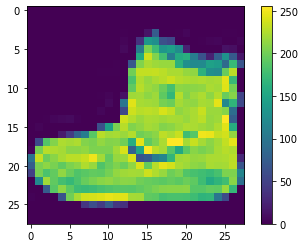

In [4]:
#visualizing first training image
print('This is an', class_names[train_labels[0]])

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#scaling pixel values to a range of 0 to 1
train_images = train_images / 250.0
test_images = test_images / 250.0

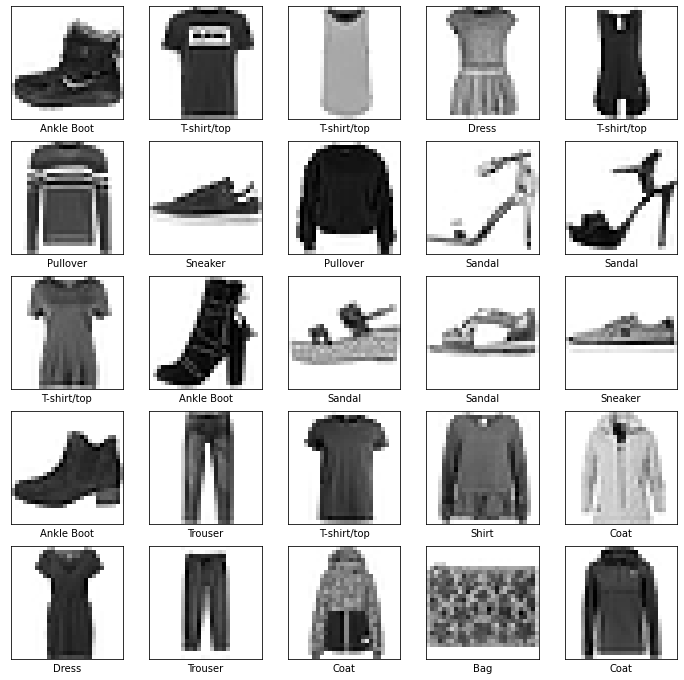

In [6]:
#displaying first 25 images from training set
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])

In [7]:
#building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
#compiling the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [9]:
#training the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4928 - accuracy: 0.8266
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3750 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3345 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3091 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2920 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2776 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2656 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2547 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2447 - accuracy: 0.9089
Epoch 10/10
60

In [10]:
#evalutation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('The test accuracy is:', test_acc)

10000/1 - 0s - loss: 0.2618 - accuracy: 0.8830
The test accuracy is: 0.883


In [11]:
#convert outcomes to probabilities
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = prob_model.predict(test_images)

In [32]:
#visualitzing model results

#plotting functions
def plot_image(i, images, labels, predictions):
    image, true_label = images[i], labels[i]
    
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    predicted_label = np.argmax(predictions[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100 * np.max(predictions[i]),
                                   class_names[true_label]),
                                    color=color)
    
def plot_predictions(i, labels, predictions):
    label, predictions = labels[i], predictions[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plot = plt.bar(range(10), predictions)
    plt.ylim([0,1])
    
    predicted_label = np.argmax(predictions)
    plot[predicted_label].set_color('red')
    plot[label].set_color('green')
        
    

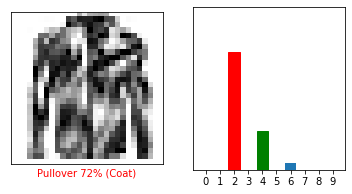

In [57]:
i=17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_images, test_labels, predictions)
plt.subplot(1,2,2)
plot_predictions(i, test_labels, predictions)
plt.show()

This prints the first 20 test images with colorcoded bar charts, that show the model predictions for the labels:
Green symbolizes the right label. Red means, the model chose the wrong cloth category.


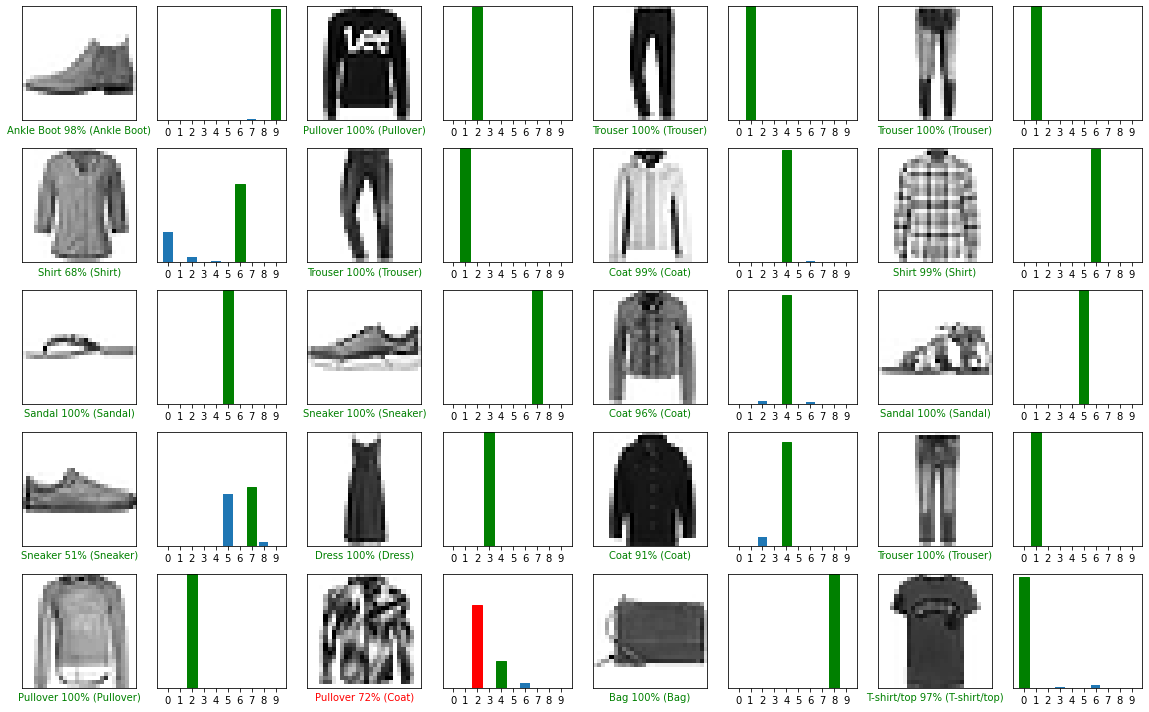

In [71]:
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
print("This prints the first {} test images with colorcoded bar charts, that show the model predictions for the labels:"
      .format(num_images))
print("Green symbolizes the right label. Red means, the model chose the wrong cloth category.")

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols * 2, 2*i+1)
    plot_image(i, test_images, test_labels, predictions)
    plt.subplot(num_rows, num_cols * 2, 2*i+2)
    plot_predictions(i, test_labels, predictions)

plt.tight_layout()
plt.show()